IMPORT LIBARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import tensorflow as tf
from tensorflow import keras

TRAINNING SET

In [2]:
CATEGORIES = ["WithMask", "WithoutMask"]

#Image Size
IMG_SIZE = 50

#Directory
Train_DATADIR = "D:\My-Project\Machine learning\Datasets\Face Mask Dataset\Train"
Test_DATADIR = "D:\My-Project\Machine learning\Datasets\Face Mask Dataset\Test"
Validation_DATADIR = "D:\My-Project\Machine learning\Datasets\Face Mask Dataset\Validation"

#Initialize List
training_data = []
testing_data = []
validation_data = []

#Create List
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(Train_DATADIR, category) #path to directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
      
def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(Test_DATADIR, category) #path to directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
            
def create_validation_data():
    for category in CATEGORIES:
        path = os.path.join(Validation_DATADIR, category) #path to directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                validation_data.append([new_array, class_num])
            except Exception as e:
                pass
            

In [3]:
create_training_data()
create_testing_data()
create_validation_data()

In [4]:
#Shuffle Train + Validation Set
import random

random.shuffle(training_data)
random.shuffle(validation_data)

print(f"Len of Train Set: {len(training_data)}")
print(f"Len of Test Set: {len(testing_data)}")
print(f"Len of Validation Set: {len(validation_data)}")

Len of Train Set: 10000
Len of Test Set: 992
Len of Validation Set: 800


CREATE X_TRAIN, Y_TRAIN, X_TEST, Y_TEST, X_VAL, Y_VAL

In [5]:
X_train = []
y_train = []

X_test = []
y_test = []

X_val = []
y_val = []

In [6]:
#X_train, y_train
for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)
    
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

In [7]:
#X_test, y_test
for feature, label in testing_data:
    X_test.append(feature)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)

In [8]:
#X_val, y_val
for feature, label in validation_data:
    X_val.append(feature)
    y_val.append(label)
    
X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_val = np.array(y_val)

Save X_train, y_train, X_test, y_test, X_val, y_val

In [9]:
#X_train, y_train
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

#X_test, y_test
pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

#X_val, y_val
pickle_out = open("X_val.pickle", "wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("y_val.pickle", "wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()

BUILDING MODEL

In [10]:
X_train = X_train / 250.0
X_test = X_test / 250.0
X_val = X_val / 250.0

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [18]:
model = Sequential()
#1st Layer
model.add(   Conv2D(64, (3,3), input_shape = X_train.shape[1:])  )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#2nd Layer
model.add(Conv2D(64, (3,3) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#3rd Layer
model.add(Flatten())
model.add(Dense(64))

#Out Layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

#compile Model
model.compile(loss="binary_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
activation_9 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7744)             

In [19]:
print(f"Shape of X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape} | y_val: {y_val.shape}")

Shape of X_train: (10000, 50, 50, 3) | y_train: (10000,)
Shape of X_val: (800, 50, 50, 3) | y_val: (800,)


In [21]:
model.fit(X_train, y_train, batch_size = 64, epochs = 4, validation_data = (X_val, y_val))

Epoch 1/4
157/157 [==============================] - 64s 408ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0180 - val_accuracy: 0.9962
Epoch 2/4
157/157 [==============================] - 64s 405ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0148 - val_accuracy: 0.9937
Epoch 3/4
157/157 [==============================] - 64s 406ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.0116 - val_accuracy: 0.9962
Epoch 4/4
157/157 [==============================] - 64s 406ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0087 - val_accuracy: 0.9950


In [22]:
# print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

8/8 [==============================] - 2s 228ms/step - loss: 0.0357 - accuracy: 0.9909
test loss, test acc: [0.035669926553964615, 0.9909273982048035]
Generate predictions for 3 samples
predictions shape: (3, 1)


In [23]:
X_test.shape

(992, 50, 50, 3)

Choose a number from 0->992


 990


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
c:\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Without Mask


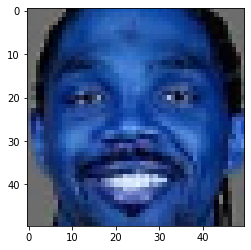

In [24]:
print("Choose a number from 0->992")
n = int(input())
plt.imshow(X_test[n])
if (model.predict_classes(X_test[[n]]) == 0):
    print("With Mask")
else:
    print("Without Mask")

In [41]:
#Load Image
img = cv2.imread("khau-trang-family-3.jpg")
img_2 = cv2.imread("face.jfif")

#resize image
new = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
new = np.array(new).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

new_2 = cv2.resize(img_2, (IMG_SIZE, IMG_SIZE))
new_2 = np.array(new_2).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

Without Mask


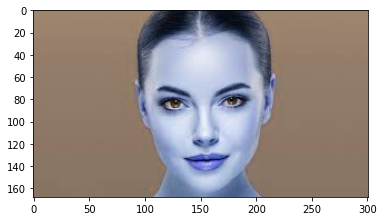

In [42]:
plt.imshow(img_2)
if (model.predict_classes(new_2) == 0):
    print("With Mask")
else:
    print("Without Mask")

With Mask


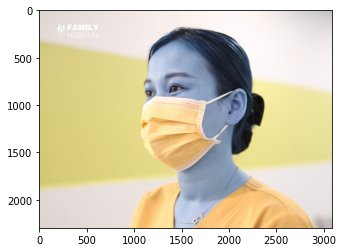

In [43]:
plt.imshow(img)
if (model.predict_classes(new) == 0):
    print("With Mask")
else:
    print("Without Mask")

c:\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


With Mask


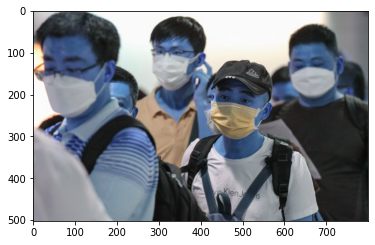

In [45]:
img_3 = cv2.imread("Phuctap.jpg")
new_3 = cv2.resize(img_3, (IMG_SIZE, IMG_SIZE))
new_3 = np.array(new_3).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

plt.imshow(img_3)
if (model.predict_classes(new_3) == 0):
    print("With Mask")
else:
    print("Without Mask")

In [48]:
model.save("MaskDetection_model")

INFO:tensorflow:Assets written to: MaskDetection_model\assets
